<a href="https://colab.research.google.com/github/HovhannesArustamyan/Neural_Networks/blob/master/Neural_Network_softmax_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train , test = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
train[0].shape

(60000, 28, 28)

In [6]:
test[0].shape

(10000, 28, 28)

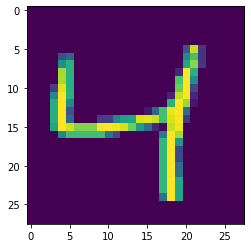

In [10]:
plt.imshow(train[0][2])

In [12]:
x_train = np.reshape(train[0] , (60000,-1))

In [15]:
x_train.shape

(60000, 784)

In [16]:
y_train = train[1]

In [17]:
x_test  = np.reshape(test[0] , (10000,-1))

In [18]:
x_test.shape

(10000, 784)

In [19]:
y_test = test[1]

In [31]:
y_test[0]

7

In [21]:
model = tf.keras.Sequential()

In [22]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [24]:
model.add(tf.keras.layers.Dense(10))

In [27]:
model.build(input_shape=(None , 784))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True')

In [33]:
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [34]:
output= model.fit(x_train , y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test), )

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 3.8201 - accuracy: 0.8511 - val_loss: 0.7760 - val_accuracy: 0.8577
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5308 - accuracy: 0.8951 - val_loss: 0.4608 - val_accuracy: 0.9115
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3351 - accuracy: 0.9230 - val_loss: 0.3997 - val_accuracy: 0.9253
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2514 - accuracy: 0.9380 - val_loss: 0.3597 - val_accuracy: 0.9291
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2123 - accuracy: 0.9452 - val_loss: 0.3339 - val_accuracy: 0.9356
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1947 - accuracy: 0.9486 - val_loss: 0.3194 - val_accuracy: 0.9368
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1785 - accuracy: 0.9521 - val_loss: 0.3053 - val_accuracy: 0.9404
Epoch 

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2620 - accuracy: 0.9479


[0.26197516918182373, 0.9478999972343445]

In [50]:
x_train[:1].shape

(1, 784)

In [42]:
model(x_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[  5.2960424,  -4.1811595,  -6.7707095,  38.270195 , -19.312765 ,
         51.482613 ,  -8.759995 , -18.867893 ,  10.772281 ,  16.337057 ]],
      dtype=float32)>

In [45]:
tf.nn.softmax(model(x_train[:1]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[8.7383029e-21, 6.6915999e-25, 5.0223002e-26, 1.8277599e-06,
        1.7945540e-31, 9.9999821e-01, 6.8701688e-27, 2.8000198e-31,
        2.0879838e-18, 5.4510387e-16]], dtype=float32)>

In [46]:
y_train[0]

5

In [ ]:
output.history["loss"]